# Recurrent neural network
RNN is specialized for  tasks that involve sequential inputs, such as speech and language. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations

Compares to normal neural networks, RNN has the advantages of
* Managing different input and output length
* Sharing features learned across different position of the sequence 

## Notations
$x^{(i)<t>}$: the input from the $i$th training example at the time step $t$

$y^{(i)<t>}$: the output for the $i$th training example at the time step $t$ (not necessarily a fixed size)

$T_x^{(i)}$: size of the input of the $i$th training example

$T_y^{(i)}$: size of the output of the $i$th training example

$a^{<t>}$: the activation at the time step $t$ ($a^{<0>} = \vec{0}$)

## Representing words
Each word is represented as a one-hot vector based on a dictionary

## Architecture
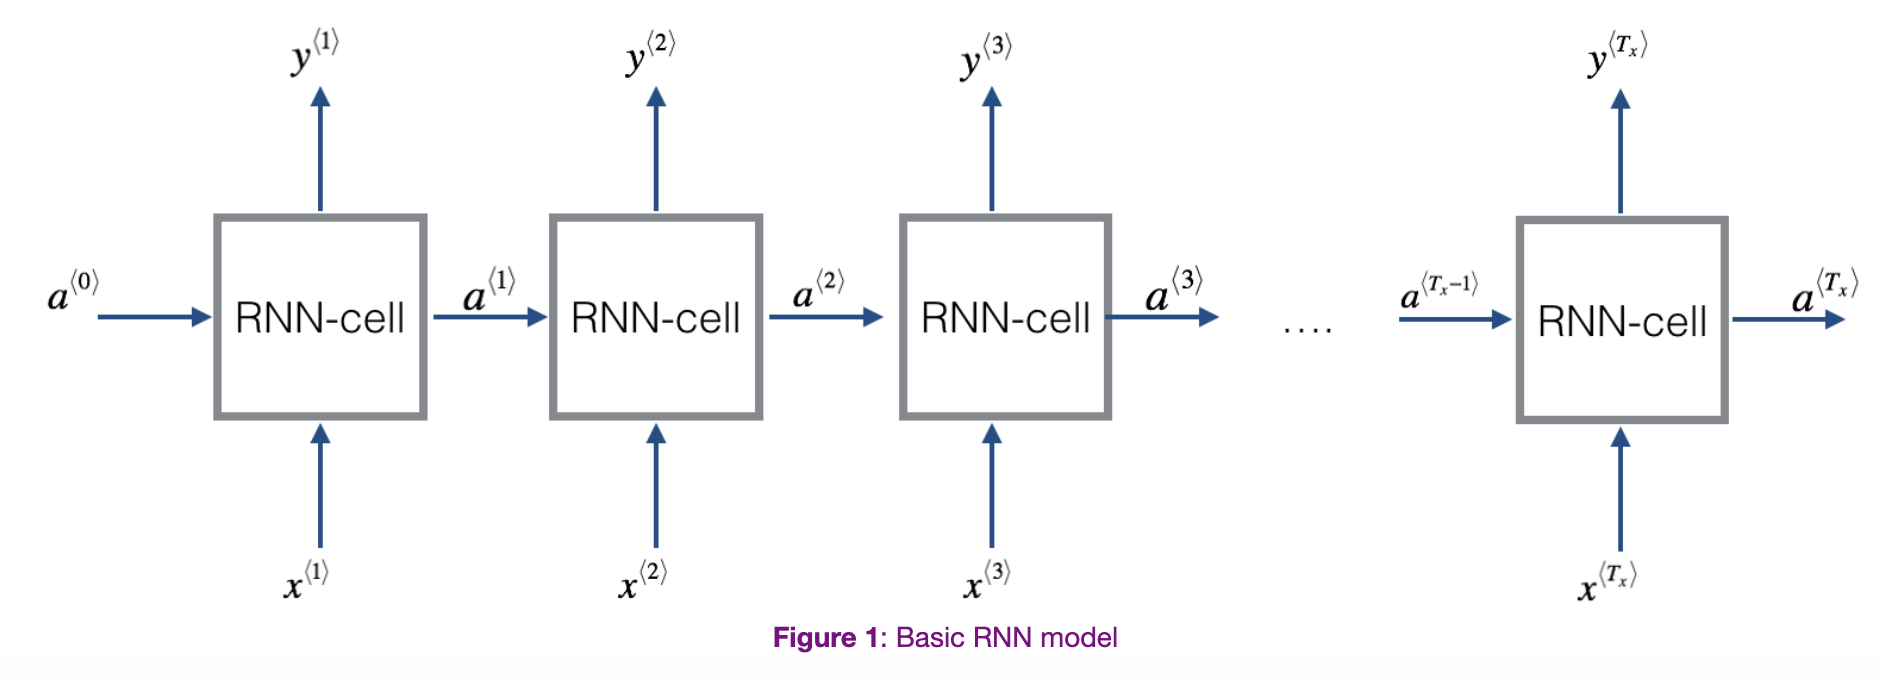

The image shows the unfolded version of a RNN. The actual RNNs use one cell repeatedly

At each time step, the network will take in an activation from the current time step, $x^{<t>}$, and an activation from the previous time step, $a^{<t-1>}$ to provide the output $y^{<t>}$ and pass the activation to the next time setp, $a^{<t>}$

### Forward propagation
$$a^{<t>} = g_1(W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a)$$
$$y^{<t>} = g_2(W_{ya}a^{<t-1>} + b_y)$$

RNN cell architecture
<img src="https://global.discourse-cdn.com/dlai/original/3X/2/c/2cd9b38764a152e508d90650b5a365599c6347f8.png">

Note: in RNN, tanh activation is used most often

## Loss function
$$L(\hat{y}, y) = \sum^{T_y}_{t=1} -y^{<t>}log(\hat{y}^{<t>}) - (1 - y^{<t>})log(1 - \hat{y}^{<t>})$$


# Different types of RNN
1. Many to many: many input and many output (eg. translation)
2. Many to one: many input and only one output (eg. movie rating based on description)
3. One to many: one input and many output (eg. music generation)

# Training language model
1. Collect large corpus (body) of text as the training set
2. Tokenize the training text into one-hot vectors based on the dictionary (UNK for unknown words)
3. Feed the tokenized input to the network one by one and predict the probability of the next word ($x^{<0>} = \vec{0}$)
4. Construct the cost function based on the predicted probability and perform gradient descents to update parameters

# Generate sequence 
In order to generate text, we can randomly sample a word based on the probability distrubtion of the softmax output at the time step, $y^{<t>}$. Then, the sampled word is fed as the input of the next time step, where $x^{<t+1>} = y^{<t>}$, to generate a sequence

Initially, we start with $a^{<0>} = \vec{0}$ and $x^{<1>} = \vec{0}$

<img src="https://media5.datahacker.rs/2020/09/59-1-1024x410.jpg" width=700>

# Vanishing gradient
For a long sequential data, tranditional RNNs will experience vanishing gradient, causing the model to take longer to train and difficult to learn long term dependencies (context of a long sentence)

## Gated recurrent unit (GRU)
GRU solves the vanishing gradient problem by capturing the long term dependencies using memory cells

$$c^{<t>} = a^{<t>}$$

$$\tilde c^{<t>} = tanh(W_{cc}(\Gamma_r * c^{<t-1>}) + W_{cx}x^{<t>} + b_c)$$

$$\Gamma_u = \sigma(W_{uc}c^{<t-1>} + W_{ux}x^{<t>} + b_u)$$

$$\Gamma_r = \sigma(W_{rc}c^{<t-1>} + W_{rx}x^{<t>} + b_r)$$

$$c^{<t>} = \Gamma_u * \tilde c^{<t>} + (1 - \Gamma_u) * c^{<t - 1>}$$

$c^{<t>}$: the actual memory content at time step $t$. Initially, we can set $c^{<0>} = a^{<0>}$. Note that $c^{<t>}$ can be a matrix, implying it captures multiple dependencies at the same time

$\tilde c^{<t>}$: the current memory content at time step $t$, which is the candidate for updating the actual memory content. Note that the current memory content depends on the actual memeory content, $c^{<t-1>}$, the input at this time step, $x^{<t>}$, and the relavance gate, $\Gamma_r$

$\Gamma_r$: the relavance gate that decides how relevant is the the actual memory content, $c^{<t-1>}$, to compute the current memory content $\tilde c^{<t>}$. $\Gamma_r$ depends on the actual memory content, $c^{<t-1>}$ and the input at this time step, $x^{<t>}$

$\Gamma_u$: the update gate that decides whether acutal memory content, $c^{<t>}$, will be updated to the calculated current memory content, $\tilde c^{<t>}$. $\Gamma_u$ depends on the actual memory content, $c^{<t-1>}$ and the input at this time step, $x^{<t>}$

$c^{<t>} = \Gamma_u * \tilde c^{<t>} + (1 - \Gamma_u) * c^{<t - 1>}$: the function that decides whether the value $c^{<t>}$ will be updated to the value of $\tilde c^{<t>}$. $*$ denotes for element-wise multiplication so, $c^{<t>}$, $\tilde c^{<t>}$, $\Gamma_u$, and $\Gamma_r$ must have the same dimensions

Note: since $\Gamma_r$ and $\Gamma_u$ are calculated with a sigmoid function, their actual values will be very close to either 0 or 1, which indiate relavent if $\Gamma_r \approx 1$ or irrelavent if $\Gamma_r \approx 0$ and update the value if $\Gamma_u \approx 1$ or not update the value if $\Gamma_u \approx 0$. This update can be partial since all variables are matrices

If $\Gamma_u \approx 1$, $c^{<t>} = \tilde c^{<t>}$

If $\Gamma_u \approx 0$, $c^{<t>} = c^{<t-1>}$

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/gru-ltr.png?00f278f71b4833d32a87ed53d86f251c" width=500>

## LSTM

$$\tilde c^{<t>} = tanh(W_{ca}a^{<t-1>} + W_{cx}x^{<t>} + b_c)$$

$$\Gamma_u = \sigma(W_{ua}a^{<t-1>} + W_{ux}x^{<t>} + b_u)$$

$$\Gamma_f = \sigma(W_{fa}a^{<t-1>} + W_{fx}x^{<t>} + b_f)$$

$$\Gamma_o = \sigma(W_{oa}a^{<t-1>} + W_{ox}x^{<t>} + b_o)$$

$$c^{<t>} = \Gamma_u * \tilde c^{<t>} + \Gamma_f * c^{<t - 1>}$$

$$a^{<t>} = \Gamma_o * c^{<t>}$$

$\tilde c^{<t>}$: in LSTM, the current memory content depends on the activation from the previous time step, $a^{<t-1>}$, and the input at the current time step, $x^{<t>}$

$\Gamma_u$, $\Gamma_f$, $\Gamma_o$: the update gate, forget gate, and output gate; all depend on the activation from the previous time step, $a^{<t-1>}$, and the input at the current time step, $x^{<t>}$

$c^{<t>} = \Gamma_u * \tilde c^{<t>} + \Gamma_f * c^{<t - 1>}$: the function that decides whether to update the memory content or not. Compared to the equation of GRU, this equation is more powerful because it uses two gates to update the memeory content; this means we can not only makes decision on whether to update the memory content to $\tilde c^{<t>}$ or not, but can also decide to keep both $\tilde c^{<t>}$ and $c^{<t - 1>}$ by adding them when $\Gamma_u \approx 1$ and $\Gamma_f \approx 1$

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/lstm-ltr.png?4539fbbcbd9fabfd365936131c13476c" width=500>

In general, LSTM is more powerful and flexible than the GRU but requires more computational power

# Bidirectional RNN
Bidirectional recurrent neural networks connect two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past and future states simultaneously

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/bidirectional-rnn-ltr.png?e3e66fae56ea500924825017917b464a" width=500>

# Deep RNN
The Deep RNN is constructed by stacking multiple layers of RNN together. Thus, each unit will recieve two inputs, one from the previous layer at the same time step and one from the current layer at the previous time step

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/deep-rnn-ltr.png?f57da6de44ddd4709ad3b696cac6a912" width=500>

# NLP and word embedding
Issue: in the one-hot representation, words are treated as individuals with no relations to other words

## Word embedding
Word embedding is featurized word presentation in a multi-dimensional space with values assigned to all the features. The distance and direction between vectors reflect the similarity and relationships among the corresponding words

<img src="https://miro.medium.com/v2/resize:fit:1056/1*GkJpulpSAIm6GTeC1dVR_w.png" width=500>

## Embedding similarity
The distance and direction between vectors represents their relationship

Given two word embeddings $e_1$, $e_2$, the similarity between the two is calculated as

$$\text{Similarity} = \frac{e_1 \cdot e_2}{||e_1|| ||e_2||}$$

The similarity value is between 1 and -1, where 1 represents 100% similary, -1 represents 100% opposite, and 0 represents no relationship

<img src="https://miro.medium.com/v2/resize:fit:1400/1*sXNXYfAqfLUeiDXPCo130w.png" width=600>

## Embedding matrix
For a given word $w$ and its one-hot encoding vector $o_w$, the embedding matrix $E$ is a matrix that maps its 1-hot representation $o_w$ to its embedding $e_w$ as follows:

$$e_w = Eo_w$$

$E$: the embedding matrix with number of rows equals to number of features for the embedding and number of columns equals to the number of vocabulary in the one-hot encoding dictionary

<img src="https://miro.medium.com/v2/resize:fit:1400/1*Bq6lIOdjCK172I1V04RwLA.png" width=500>

### t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE is a technique aimed at reducing high-dimensional embeddings into a lower dimensional space. In practice, it is commonly used to visualize word vectors in the 2D space

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/t-sne-en.png?411bf8ff5d5c06c6e90cae95f7110ff1" width=500>


## Apply word embedding
Word embeddings is widely used for transfer learning

Steps:
1. Train a model to learn word embeddings from a large corpus of text or use a pre-trained embedding
2. Use the word embedding on a smaller training set to complete the given task
3. (Optional) Fine tune the word embedding based on the transfer learning

# Learning word embedding
Note: the individual components of the learned word embeddings are not necessarily interpretable since the axis chosen by the algorithm does not necessarily align with interpretable axis

## Word2vec
Word2vec is a framework aimed at learning word embeddings by estimating the likelihood that a given word is surrounded by other words

### Skip-gram
The skip-gram word2vec model is a supervised training model that takes in an context word, $c$, and will predict a target word, $t$, where $c$ is randomly selected within a window around $t$. First, we convert $c$ from its one-hot vector, $o_c$, into embedding, $e_c$, using the embedding matrix, $E$. Then, we feed the embedding, $e_c$, into a softmax unit to predict the probability of each word in the vocabulary list with size $m$ to be the target word, where

$$P(t|c) = \frac{e^{\theta^T_te_c}}{\sum^{m}_{j=1}e^{\theta^T_je_c}}$$

$P(t|c)$: the probability of a word being the target word, $t$, given the context word, $c$

$\theta_t$: the parameters in the softmax unit that associate with $t$

Loss function:
$$L(\hat y, y) = - \sum_{i=1}^{m}y_i log(\hat y_i)$$

We can then use gradient descent to train the parameters within the softmax unit and the embedding matrix, $E$

To sample a context word, $c$, certain weight is used instead of the random distribution to prevent over selecting most common words

Note: summing over the whole vocabulary in the denominator of the softmax part makes this model computationally expensive. To solve this, we can use a hierarchical softmax classifier instead of a normal classifier to speed up the computation

<img src="https://aegis4048.github.io/images/featured_images/skip-gram.png" width=700>

### Negative sampling
Use the same approach as the skip-gram model to sample a context word, $c$, and a target, $t$ and set this pair as the positive pair. Then, use $c$ and pair it up with $k$ random selected words from the vocabulary dictionary to create $k$ negative samples

To train the embedding matrix, we covert the both $c$ and $t$ into their embeddings and feed it into a network with logistic units to calculate the probability on how likely the context word and target word will appear together, where

$$P(y=1|c, t) = \sigma(\theta_t^Te_c)$$

$P(y=1|c, t)$: the probability of the context and the target word appears simultaneously

For each iteration, the model is only trained on one positive example and $k$ negative examples with a set of binary classifiers. This speeds up the training speed significantly compares to the skip-gram model

<img src="https://aegis4048.github.io/jupyter_images/neg_opt_1.png">

## GloVe
The GloVe model uses a co-occurence matrix $X$, where each $X_{i,j}$ denotees for the number of times that a target word $i$ appears in the context of the word $j$

Its cost function is
$$J(\theta) = \frac{1}{2}\sum_{i, j=1}^{m}f(X_{i,j})(\theta_t^Te_c + b_i + b'_j + log(X_{i,j}))^2$$

$f$: a weighting function such that $f(X_{i,j}) = 0$ when $X_{i,j} = 0$ (do not add loss if two words are not in context)

Initially, we initialize $e$ and $\theta$ randomly. After training, given the symmetry that $e$ and $\theta$ play in this model, the final word embedding $e_w^{final} = \frac{e_w + \theta_w}{2}$

# Sentiment classification
Sentiment classification predicts the sentiment based on a given sentence

To make predictions, we first convert all the words in the sentence from one-hot vector into embeddings. Then, take the average or sum of the embeddings and feed it into a softmax unit for classificatioin. An issue of this method is that it is not good at catching multiple negations in the same sentence

Another method is to feed the word embeddings of the sentence into a RNN by time steps and feed the activation from the last time step into a softmax unit for classification

<img src="https://www.tensorflow.org/static/text/tutorials/images/bidirectional.png" width=400>

# Sequence to sequence model
Seuqence to sequence model turns one sequence into another sequence (eg. translation, text generation)

The basic sequence to sequence model has an encoder and a decoder. The encoder takes in the input sequence, converts it to encoding, and feed it to the decoder. The decoder will generate a sequence based on the given encoding. Compared to the language model previously with input activation of, $\vec 0$, the sequence to sequence model is a conditional language model that generate a sequence with maximum probability (the most likely sequence) given the ecoding as the condition

For the generation process, we find the sentence with max probability given the encoding, $P(y^{<1>}, ..., y^{<T_y>}|encoding)$, by using the beam search.

The greedy search does not work well in this condition because it only maxmizes the probability of each word based on the previous words, but not maxmizes the probability of the entire generated sequence

Note: the encoder can be a CNN, RNN, or other architecture depending on the input data

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Ismhi-muID5ooWf3ZIQFFg.png" width=500>

## Beam search
Beam search is used to find the most likely output sequence, $y$, given the input encoding, $x$

Steps:
1. Define a beam width, $B$
2. At the fist time step, select the top $B$ words with the highest probability
3. For each word/sequence, feed it into seconds time step and compute the combined probability. Only keep track of the top $B$ sequences with the highest probability and drop the rest
4. Repeat step 3

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/beam-search-en.png?3515955a2324591070618dd85812d5d7" width=900>

$B$: the beam width that determines the number of most likely sentence to be track of. Large values of $B$ yield to better result but with slower performance and increased memory. Small values of $B$ lead to worse results but is less computationally intensive. A standard value for $B$ is around 10

### Length normalization
The combined probability is calculated by multiplying each word given the previous words, where

$$P = \text{argmax}_y \Pi_{t=1}^{T_y}P(y^{<t>}|x, y^{<1>}, ...y^{<t-1>})$$

Thus, the longer the sentence, the combined probability will be smaller and can result in numerical under-floor. To prevent this, we apply the normalized log-likelihood objective, where

$$Objective = \text{argmax}_y \frac{1}{(T_y)^{\alpha}} \sum_{t=1}^{T_y}log(P(y^{<t>}|x, y^{<1>}, ...y^{<t-1>}))$$

This allows the objective to be calculated as a sum to prevent numerical under-floor. Since the objective is calculated on a log scale, the values of the objective will be negative, and more negative objective indicates smaller proabability; less negative objective indicates greater proabability

Since longer sequence will have a smaller probability, the model will tend to generate shorter sequence. To prevent this, we apply the term $\frac{1}{(T_y)^{\alpha}}$ to compute the average probability to ensure the model can generate long sequences as well. $\alpha$ is a softener with its value usually between 0.5 and 1

### Beam search error analysis
The beam search error analysis helps us determine whether is badly generated sequence is caused by the RNN or the beam search algorithm

Suppose $\hat y$ is a bad sequence generated by the model and $y$ is a good target sequence, we can then calculate the probablity, $P(\hat y|x)$ and $P(y|x)$

* If $P(\hat y|x) \geq P(y|x)$: the probability of the model to generate a good sequence is lower than the probability of the model to generate a bad sequence indicates the RNN is not able to generate a good sequence. This can be solved by using a different architecture, applying regularizations, or getting more training data

* If $P(\hat y|x) < P(y|x)$: the probability of the model to generate a good sequence is higher than the probability of the model to generate a bad sequence indicates the RNN is able to generate a good sequence, but the beam search algorithm is not able to pick it up. This can be solved by increasing the beam width

Note: if length normalization is applied, the objective should be compared instead of the probability

## Bleu score
The bilingual evaluation understudy (Bleu) score quantifies how good a machine translation is by computing a similarity score based on n-gram precision

### n-grams
N-grams are contiguous sequences of n items that aims at quantifying the probability that an expression appears in a corpus by counting its number of appearance in the training data

<img src="https://cdn.botpenguin.com/assets/website/N_Gram_feb7947286.png" width=300>

The bleu score on n-gram only is
$$p_n = \frac{\sum_{n-gram \in \hat y} \text{count}_{clip}(\text{n-gram})}{\sum_{n-gram \in \hat y} \text{count}(\text{n-gram})}$$

$p_n$: n-gram precision calculated by the number of correct predicted n-gram over the number of total predicted n-grams

$\sum_{n-gram \in \hat y}$: for each contiguous sequences in the generated sequence

$\text{count}_{clip}(\text{n-gram})$: the maximum number of a n-gram appears in only one reference

$\text{count}(\text{n-gram})$: the total number of n-gram in the genreated sequence


The combined bleu score is
$$\text{Bleu score} = exp({\frac{1}{n}\sum_{k=1}^{n}p_k})$$

The bleu score is a number between 0 and 1. The closer the score to 1, the more similar the generated sequence and the reference are

# Attention model
The attention model allows a RNN to pay attention to specific parts of the input that is considered as being important, which improves the performance of the resulting model in practice, espcially in the case when the input sequence is very long

First, the attention model uses a bidirectional RNN as an encoder to convert the input sequence to an activation, $a^{<t'>}$, where $a^{<t'>}$ combines the activations of the $t'$th word from both directions. Then, another RNN is used to generate the output, $y^{<t>}$, by taking in the context, $c^{<t>}$, and the activation from the previous time step, $s^{<t-1>}$

The context $c^{<t>}$ is determined by activations from the encoder, $a^{<t'>}$, and the attention weights, $\alpha^{<t, t'>}$, where $\alpha^{<t, t'>}$ indicates how much attention should be paid to the activation from the $t'$th word in the input, $a^{<t'>}$, when generating the $t$th output word

The sum of attention weights for the $t$th output equals 1, given by
$$\sum_{t'}\alpha^{<t, t'>} = 1$$

The attention weights are calculated as
$$\alpha^{<t, t'>} = \frac{exp(e^{<t, t'>})}{\sum_{t''=1}^{T_x} exp(e^{<t, t''>})}$$
This is a softmax implementation that allows the sum of attention weights to be 1

To compute $e^{<t, t'>}$, we uses a small neural network with the input $s^{<t-1>}$ and $a^{<t'>}$, since how much attention should be paid to the activation, $a^{<t'>}$, should depend on the input activation it self, $a^{<t'>}$, and the previous activation state, $s^{<t-1>}$

After obtaining the attention weights, the context, $c^{<t>}$, is calculated as
$$c^{<t>} = \sum_{t'}\alpha^{<t, t'>} a^{<t'>}$$

<img src="https://yakout.io/assets/images/cs-435/attention-model-arch.png" width=600>

# Speech recongnition and trigger word detection
## Model
* Attention model
* Connectionist temporal classification (CTC) model


# Transformer
The transformer model uses the attention model, but CNN style of process. This means it can process the entire input sequence at once using parallelization while understanding the context of the sequence, which improves both the computational speed and model performance

## Self-attention
One issue of traditional word embedding is that the embedding vectors do not account for the context of the text since a word can have different meaning in different context. Self-attention is a way to solve this by applying the attention model to take a traditional embedding, $e^{<t>}$, as input and output a more refined, contextualized embedding, $A^{<t>}$. This significantly improves the ability for the model to "understand" the text

First, the model takes in the word embeddings in the input sequence and calculate a query vector, a key vector, and a value vector for each word, where

$$q^{<t>} = W^Qe^{<t>}$$

$$k^{<t>} = W^Ke^{<t>}$$

$$v^{<t>} = W^Ve^{<t>}$$

$q^{<t>}$: the query vector for the $t$th word that "looks" for a specific context (feature) from other words that can influence the meaning of this word

$k^{<t>}$: the key vector for the $t$th word that encodes how the $t$th word, as context, can influence the meaning of other words

$v^{<t>}$: the value vector for the $t$th word that determines a word's embedding should be influenced if the $t$th word has influence on it. In other word, $v^{<t>}$ determines how a word embedding should be updated with the $t$th word as context

To calculate the attention

$$A^{<t>}(q^{<t>}, K, V) = \sum_{i}\frac{exp(q^{<t>} \cdot k^{<i>})}{\sum_{j}exp(q^{<t>} \cdot k^{<j>})}v^{<i>}$$

$A^{<t>}(q^{<t>}, K, V)$: the attention (updated, refined, contextualized embedding) of the $t$th word

$q^{<t>} \cdot k^{<i>}$: a dot product that determines how much the $i$th word influence the meaning of the $t$th word. The larger the value, the more $i$th word can influence the meaning of the $t$th word

$\frac{exp(q^{<t>} \cdot k^{<i>})}{\sum_{j}exp(q^{<t>} \cdot k^{<j>})}$: a softmax implementation that calculates the probabilty distribution on how much each word in the sequence can influence the $t$th word

$\sum_{i}\frac{exp(q^{<t>} \cdot k^{<i>})}{\sum_{j}exp(q^{<t>} \cdot k^{<j>})}v^{<i>}$: first determines how each word in the sequence can influence the $t$th word using softmax, then update the embedding using $v^{<t>}$ and sum over the entire input sequence

Vectorized implementation:
$$A(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$$

$A(Q, K, V)$: a matrix that contains the calcualted attention

$\sqrt{d_k}$: the square root of the dimension of the key query space for numerical stability

<img src="https://sebastianraschka.com/images/blog/2023/self-attention-from-scratch/summary.png" width=700>

## Multi-head attention 
Multi-head attention performs self-attention $h$ times, where $h$ is the number of head. Each head is looking for a different feature in the context and proposes a update to improve the embedding. All the proposed changes will be added to the original embedding to obtain the refined embedding

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Ff406d55e-990a-4e3b-be82-d966eb74a3e7_1766x1154.png" width=700>

## Architecture
<img src="https://deeprevision.github.io/posts/001-transformer/transformer.png" width=600>

### Encoder
Each encoder block has 3 main layers which are multi-head attention(MHA), layer norm, and MLPs(feedforward layer). It takes in the embeddigns in the sequence as input, and process it through the a multi-head attention (MHA) layer adnd then feed it to into a multiLayer perceptrons (MLPs) to for output matrices, $K$ and $V$, that contains information about the textual context. The add&norm layer is normalization layer that is used to speed up training. Also, dropout and residual connections are used within each encoder as displayed in the diagram

Typically, the encoder is stacked up $n$ times before feeding the output to the decoder to better learn different attention representations and boost the predictive power

### Decoder
The decoder aims to fuse encoder output with the target sequence and to make predictions. It takes in the embedding of the generated sequence as input; initially, this would be a start of sentence token ($<SOS>$). This input will be passed on to a musked multi-head attention layer to generate the query matrix, $Q$, and feeds it into the second layer. Then, the next layer will takes in $Q$ from the musked multi-head attention layer from the decoder and the matrices, $K$ and $V$ from the encoder; these information will be passed into a MHA layer followed by a MLP layer. Finally, the decoder will takes the output from the MLP layer and feed it to a classifier to predict the next word

The newly generated sequence is then feed into the decoder again to generate a new matric $Q$ to predict the next word. This means the decoder block can be stacked up $n$ times until an end of sentence token ($<EOS>$) is generated

#### Musked multi-head attention
The musked multi-head attention layer is used during training to need to prevent the network having access to future tokens. This can be done by using a look-ahead mask to get future token with the value of negative infinity. After performing the softmax, all future tokens will have the value of 0, meaning the network does not have access to those tokens

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*QYFua-iIKp5jZLNT.png" width=400><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*3ykVCJ9okbgB0uUR.png" width=400>


## Positional encoding
The positional encoding are added to the input embeddings to provide information on where a word is located in the sequence. This is very important since the transformer model inputs sequence in order with no information on the position of the tokens

The positional encoding uses sine and cosine functions to give each embedding unique representation on their position in the sequence

$$PE_{(pos, 2i)} = \sin{(\frac{pos}{10000^{\frac{2i}{d}}})}$$

$$PE_{(pos, 2i + 1)} = \sin{(\frac{pos}{10000^{\frac{2i}{d}}})}$$

$pos$: the position index of the word in the sequence

$d$: size of the word embedding

Positional encoding generate values for odd positions using the sine function and even positions using the cosine function. This will be repeated until the vector has the size of $d$, meaning the postional encoding has the size dimension of the word embedding. Then, the positional encoding will be added to the word embedding to give the network information on the position of each vector

# Resources
* CS230: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#